In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from tqdm import tqdm
from matplotlib.colors import LogNorm
from matplotlib import cm

PATH = "../latex/pdf/"
# print(plt.rcParams.keys())
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.pad_inches'] = 0



In [96]:
def ψ_mn(m, n1, n2): #skalarni produkt
    return np.pi/2 *sc.beta(4+4*m,1+n1+n2)

def ψ(m: int,n: int,ξ,φ):
    # if ξ == 0 or ξ == 1 or φ == 0 or φ == np.pi:
    #     return 0
    return np.power(ξ,2*m+1)*np.power(1-ξ,n)*np.sin((2*m+1)*φ)

def A_mn(m, n1, n2):
    return -np.pi/2 * (n1*n2)*(3+4*m)/(2+4*m+n1+n2) * sc.beta(n1+n2-1,3+4*m)

def b_mn(m, n):
    return -2/(2*m+1)*sc.beta(2*m+3,n+1)
        

In [144]:
M = 20
N = 20
siz = 300
grid = np.zeros((siz,siz)) #[ξ,φ]
for m in tqdm(range(M)):
    tmpA = np.zeros((N,N))
    tmpb = np.zeros(N)
    for n1 in range(N):
        for n2 in range(N):
            tmpA[n1,n2] = A_mn(m,n1+1,n2+1)
        tmpb[n1] = b_mn(m,n1+1)
    a_m = np.linalg.solve(tmpA,tmpb)
    for i in range(siz): 
        ξ = i/(siz-1)
    
        for j in range(siz):
            φ = j/(siz-1) * np.pi
            for n in range(N):
                grid[i,j] += ψ(m,n+1,ξ,φ) * a_m[n]


100%|██████████| 20/20 [03:30<00:00, 10.52s/it]


/tmp/ipykernel_994/3997702249.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("YlGnBu_r", 10)


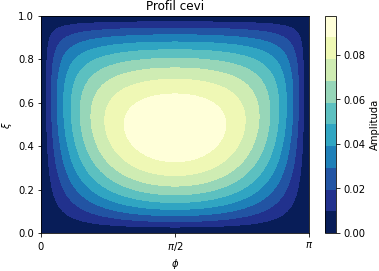

In [148]:
# grid[5,50] = 1000
cmap = cm.get_cmap("YlGnBu_r", 10)

plt.imshow(grid[::-1],extent=[0,np.pi,0,1],cmap=cmap,aspect='auto')
plt.xticks([0,np.pi/2,np.pi],[r"$0$",r"$\pi/2$",r"$\pi$"])
plt.colorbar(label="Amplituda")
plt.xlabel("$\phi$")
plt.ylabel(r"$\xi$")
plt.title("Profil cevi")
plt.savefig(PATH+"cev.pdf")

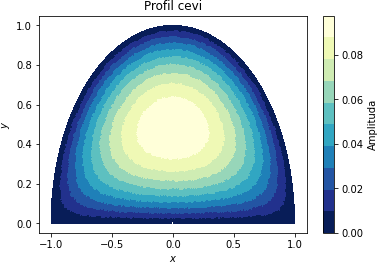

In [146]:
# grid2 = np.zeros((siz,siz)) #[x,y]
X,Y,Z=[],[],[]
for i in range(siz):
    ξ = i/(siz-1)
    for j in range(siz):
        φ = j/(siz-1) * np.pi
        x = ξ * np.cos(φ)
        y = ξ * np.sin(φ)
        X.append(x)
        Y.append(y)
        Z.append(grid[i,j])

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)


plt.tripcolor(X,Y,Z,cmap=cmap)
plt.colorbar(label="Amplituda")
plt.xlabel("$x$")
plt.ylabel(r"$y$")
plt.title("Profil cevi")
plt.savefig(PATH+"cev1.pdf")
